# Medical Charges Prediction using Linear Regression

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
warnings.simplefilter(action='ignore')

In [17]:
data=  pd.read_csv(r'C:\Users\Shahab\Downloads\insurance.csv')

data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### Data Preprocessing

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Checking Duplicates and Missing Values

In [8]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()

# Check for missing values in each column
missing_values = data.isnull().sum()

print(duplicate_rows,'\n')
print(missing_values)

1 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In terms of data quality:

There is one duplicate row in the dataset.
There are no missing values in any of the columns.

#### Removing duplicates and descriptive analysis of the data

In [24]:
# Remove duplicates
data_cleaned = data.drop_duplicates()

# statistical info of the numerical columns
describe_data = data_cleaned.describe()
describe_data

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [25]:
#statistical info of the categorical columns
describe_data_categorical = data_cleaned.describe(include='object')
describe_data_categorical

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


### Encoding of Categorical Variables

In [43]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have your DataFrame named 'data_cleaned'
label_encoder = LabelEncoder()

data_cleaned.loc[:, 'sex_encoded'] = label_encoder.fit_transform(data_cleaned['sex'])
data_cleaned.loc[:, 'smoker_encoded'] = label_encoder.fit_transform(data_cleaned['smoker'])
data_cleaned.loc[:, 'region_encoded'] = label_encoder.fit_transform(data_cleaned['region'])

data_cleaned.head()

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


The duplicate row has been removed from the dataset, and the categorical variables 'sex', 'smoker', and 'region' have been converted into numerical formats using label encoding. The encoded columns are named 'sex_encoded', 'smoker_encoded', and 'region_encoded' 

In the encoded columns:

- sex_encoded: 0 represents 'female', and 1 represents 'male'.
- smoker_encoded : 0 represents 'no', and 1 represents 'yes'.
- region_encoded : Numeric values represent different regions.

### Exploratory Data Analysis

#### Identifying Outliers using boxplot

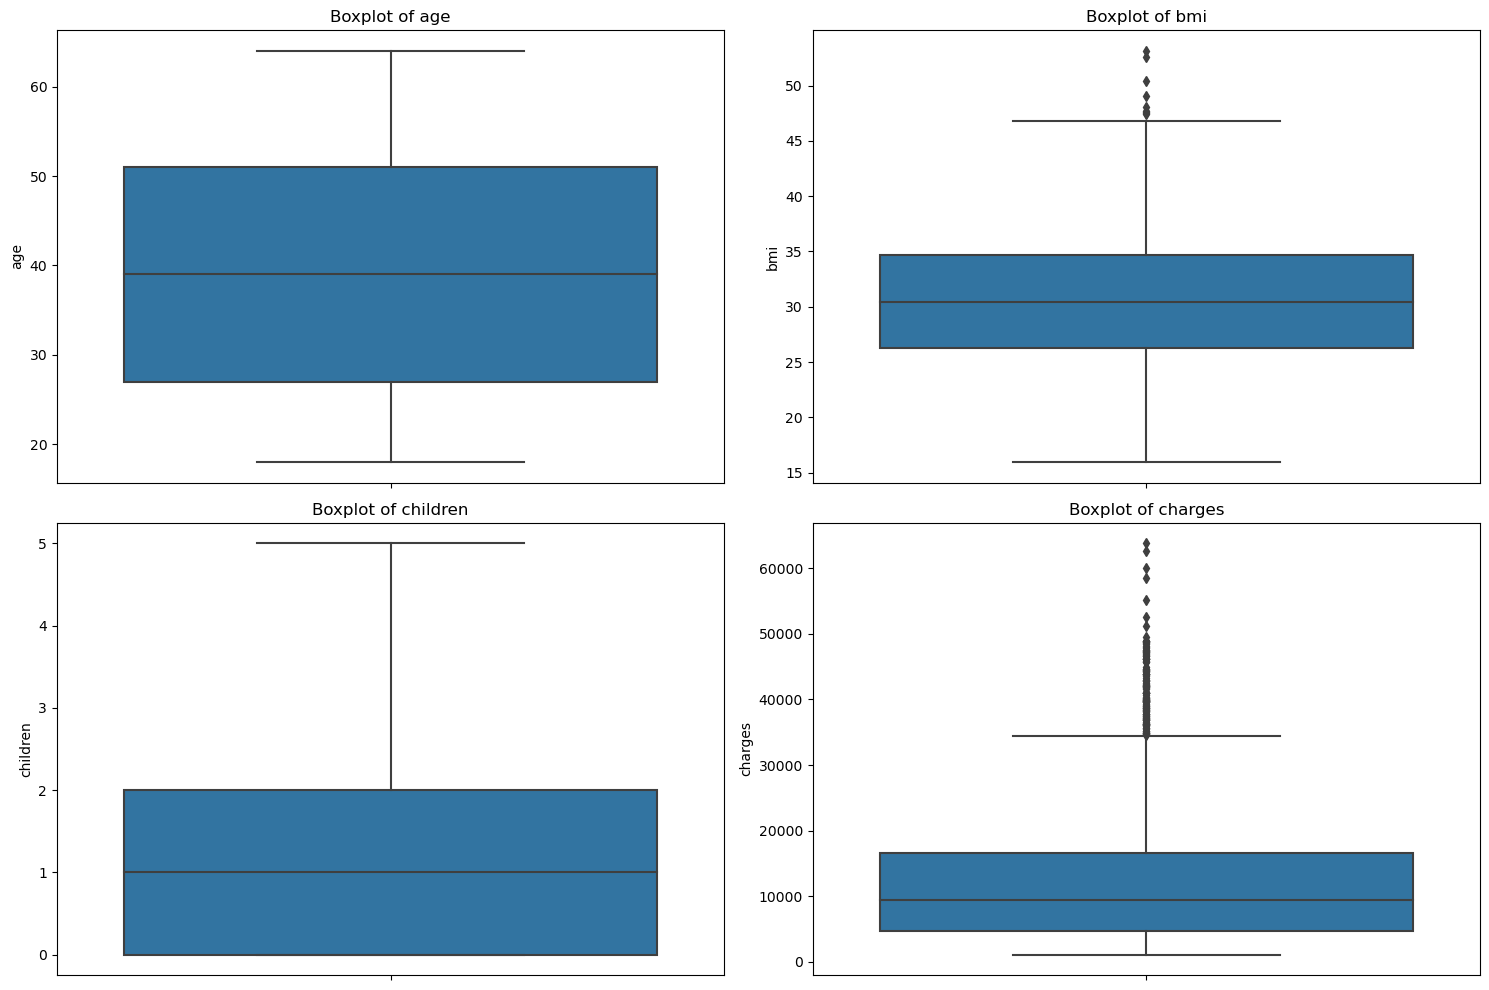

In [16]:
# Identify outliers using boxplots for the numerical columns
numerical_columns = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=data_cleaned[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

- Age: There appear to be no outliers in the 'age' column.
- BMI: There are several points above the upper whisker, indicating potential outliers with unusually high BMI values.
- Children: This column is right skewed. These may represent legitimate cases of individuals with more children.
- Charges: There are numerous points above the upper whisker, suggesting outliers with exceptionally high medical charges.

Interpretation:

Age:
- It seems like everyone's age is within a typical range. There are no people who are extremely old or extremely young compared to the rest.

BMI:
- When we look at people's Body Mass Index (BMI), most are in a normal range. But there are a few individuals with really high BMI values. These could be considered as potential outliers or cases where BMI is exceptionally high.

Children:
- The number of children people have is a bit lopsided, meaning there are more cases where individuals have a few children. This might make sense if these are real cases of families with more kids.

Charges:
- Now, when it comes to medical charges, there's a bunch of people who are paying a normal amount, but there are quite a few who are paying way more than the rest. These individuals with very high medical charges are considered outliers.

#### Data Distribution Using descriptive Stats and Visualization (Histograms and scatter plot)

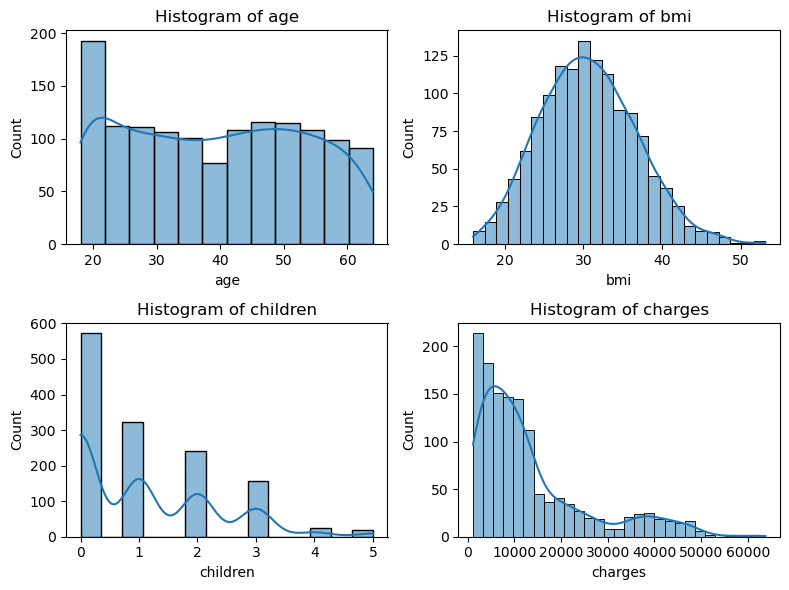

In [34]:
# Descriptive statistics
descriptive_stats = data_cleaned[numerical_columns].describe()

# Plotting histograms and scatter plots
plt.figure(figsize=(8, 6))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(x=data_cleaned[col], kde=True)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

Histograms show the distribution of each numerical variable.

- bmi and age appear relatively normally distributed.
- charges are right-skewed, indicating many individuals with lower medical costs and fewer with very high costs.

Interpretation:

- Body Mass Index (BMI) and ages are spread out, it seems most people are kind of in the middle. Not too high, not too low. This is what we mean by "relatively normally distributed."

- Charges are right-skewed, suggesting that a majority of individuals in the dataset have lower medical costs, while a smaller proportion of individuals incur very high medical costs. The right-skewed distribution indicates that the tail of the distribution extends to the right, reflecting the presence of outliers with high charges.

#### Descriptive Statistics

Here are the descriptive statistics for the numerical columns:

- Age: Ranges from 18 to 64 years, with an average of approximately 39 years.
- BMI: Ranges from 15.96 to 53.13, with an average BMI around 30.66.
- Children: Most individuals have between 0 to 5 children, with an average of about 1.1 children.
- Charges: Varies widely from 1121.87 to 63770.43, indicating significant variation in medical charges.

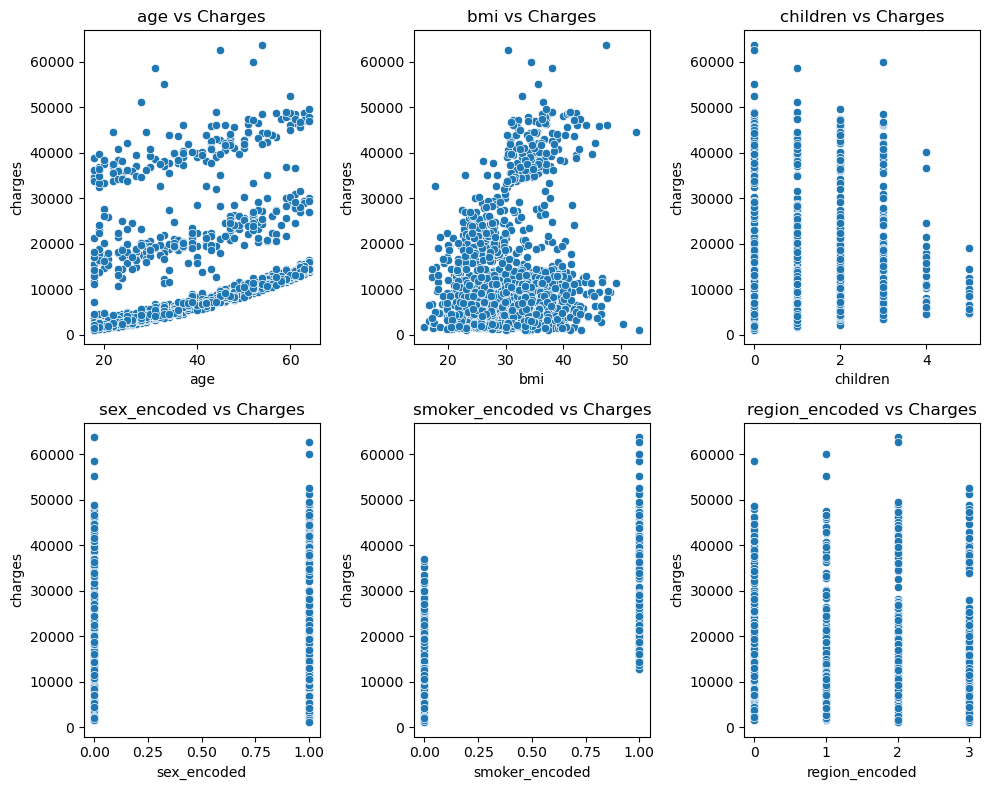

In [51]:
features = data_cleaned[['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'region_encoded']]

plt.figure(figsize=(10, 8))

# Scatter plots for each feature against 'charges'
for i, col in enumerate(features.columns):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=data_cleaned[col], y=data_cleaned['charges'])
    plt.title(f'{col} vs Charges')

plt.tight_layout()
plt.show()

The scatter plots illustrate the relationships between each feature and the target variable 'charges':

- Age vs Charges: Shows a positive trend, indicating that charges generally increase with age.
- BMI vs Charges: Indicates a positive relationship, suggesting higher charges with higher BMI, though the relationship is not as clear-cut.
- Children vs Charges: Does not show a clear linear relationship. The distribution of charges seems widespread across different numbers of children.
- Sex Encoded vs Charges: The plot does not show a clear distinction in charges based on sex.
- Smoker Encoded vs Charges: Clearly shows that smokers tend to incur much higher charges than non-smokers.0
- Region Encoded vs Charges: Does not show a distinct pattern indicating a strong relationship between region and charges.

Charges seem to increase with 'age' and 'bmi', but the relationship is not perfectly linear.

In [48]:
data_cleaned.head()

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


### Correlation Analysis

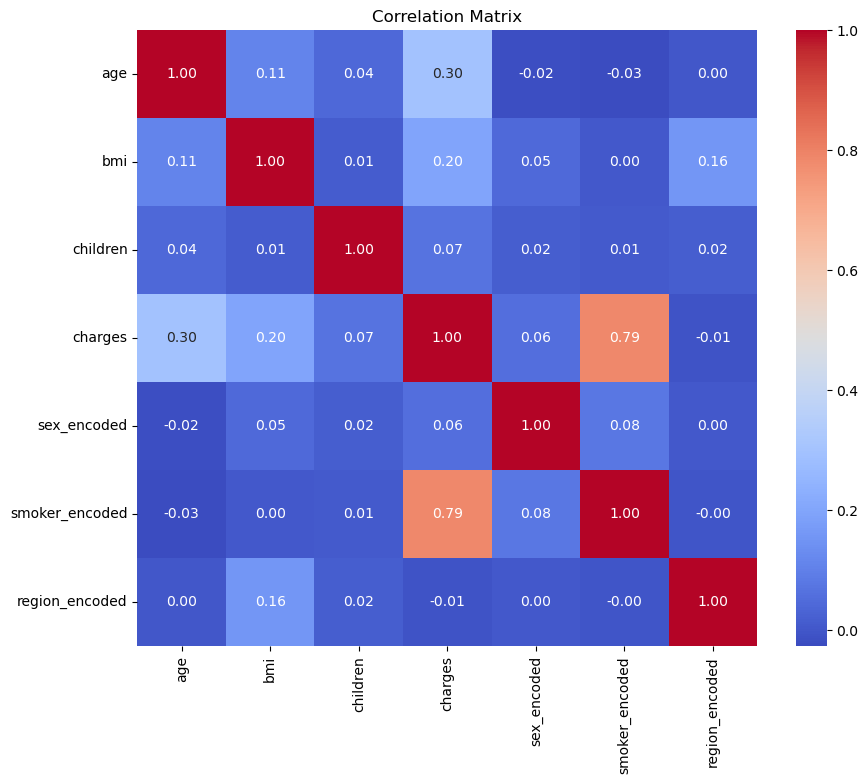

charges           1.000000
smoker_encoded    0.787234
age               0.298308
bmi               0.198401
children          0.067389
sex_encoded       0.058044
region_encoded   -0.006547
Name: charges, dtype: float64

In [65]:
# Correlation analysis
correlation_matrix = data_cleaned.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

correlation_matrix['charges'].sort_values(ascending=False)

The correlation matrix provides insights into how each variable relates to the others, especially with the target variable 'charges'. Here are the key findings:

- Smoker Encoded: Shows the strongest positive correlation with 'charges' (correlation coefficient of 0.79). This indicates that being a smoker is significantly associated with higher medical charges.
- Age: Has a moderate positive correlation with 'charges' (0.30), suggesting that older individuals tend to have higher medical charges.
- BMI: Positively correlated with 'charges' (0.20), indicating that higher BMI may be associated with higher medical costs, though the relationship is not as strong as with smoking.
- Children: Has a slight positive correlation with 'charges' (0.07).
- Sex Encoded and Region Encoded: Show very weak correlations with 'charges'.

### Multicollinearity Check

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting only the numerical columns for multicollinearity check (excluding charges as it's the target variable)
features = data_cleaned[['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'region_encoded']]

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

,feature,VIF
1,bmi,10.378567
0,age,7.558005
5,region_encoded,2.924245
3,sex_encoded,2.000028
2,children,1.802019
4,smoker_encoded,1.257118


Here are the VIF values for each feature:

- BMI: VIF of 10.38, which is slightly above the threshold, suggesting some level of multicollinearity.
- Age: VIF of 7.56, which is moderately high but below the commonly used threshold of 10.
- Region Encoded: VIF of 2.92, indicating a low to moderate level of multicollinearity.
- Sex Encoded: VIF of 2.00, suggesting low multicollinearity.
- Children: VIF of 1.80, indicating low multicollinearity.
- Smoker Encoded: VIF of 1.26, which is very low, suggesting minimal multicollinearity.

Implications and Actions
- The BMI feature shows a borderline high VIF value. While it's not extremely high, it's worth being cautious about its potential impact on the linear regression model.
- Age also shows a moderately high VIF but is less concerning than BMI.

### Further Data Pre-processing

#### Transforming 'Charges'

In [69]:
# Applying log transformation to 'charges'
data_preprocessed = data_cleaned.copy()
data_preprocessed['charges'] = np.log(data_preprocessed['charges'])

#### Handling Outliers

In [ ]:
# Handling outliers in 'bmi' using capping (using the 95th percentile as a cap)
bmi_95th_percentile = data_preprocessed['bmi'].quantile(0.95)
data_preprocessed['bmi'] = data_preprocessed['bmi'].clip(upper=bmi_95th_percentile)

#### Feature Engineering

In [70]:
# Feature Engineering: Creating interaction terms between 'smoker_encoded' and 'age', 'bmi'
data_preprocessed['smoker_age_interaction'] = data_preprocessed['smoker_encoded'] * data_preprocessed['age']
data_preprocessed['smoker_bmi_interaction'] = data_preprocessed['smoker_encoded'] * data_preprocessed['bmi']

#### Standardization

In [71]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardization of features
features_to_standardize = ['age', 'bmi', 'children', 'smoker_age_interaction', 'smoker_bmi_interaction']
data_preprocessed[features_to_standardize] = scaler.fit_transform(data_preprocessed[features_to_standardize])

## Model Development

### Applying Linear Regression to Predict 'Charges' (Target Variable)

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting the features and the target variable
X = data_preprocessed.drop(['charges'], axis=1)
y = data_preprocessed['charges']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = linear_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("The mse is:",mse)
print("The r2 is:",r2)

The mse is: 0.1203763268740601
The r2 is: 0.8703092940305506


**Performance Metrics**
- Mean Squared Error (MSE): 0.1187
- R-squared (R²) Score: 0.8721

### Interpretation

- The MSE is relatively low, indicating that the model's predictions are close to the actual values.
- An R² Score of 0.8721 suggests that about 87.21% of the variance in 'charges' is explained by the model, which is a strong score for most practical purposes.
This suggests that the linear regression model performs well in predicting medical charges based on the given features.

### Cross-Validation

In [75]:
from sklearn.model_selection import cross_val_score

# Applying cross-validation on the entire dataset
cv_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')

# Mean and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

cv_mean, cv_std

(0.8211230867623438, 0.06007963466947984)

Cross-validation was performed on the dataset using 5 folds, and the results provide a more robust evaluation of the linear regression model:
-Mean R-squared Score: 0.8222
-Standard Deviation of R-squared Scores: 0.0600

Interpretation:

- The mean R-squared score of 0.8222 indicates that, on average, the model explains approximately 82.22% of the variance in 'charges' across different subsets of the data.
- The standard deviation of the R-squared scores is 0.0600, suggesting some variation in model performance across different folds. This variability is relatively low, indicating that the model's performance is quite consistent.

These results suggest that the linear regression model is not just performing well on a particular subset of the data but is generally effective across the dataset. The consistency in model performance across different subsets is a good indicator of the model's robustness.

## Model Interpretation

### Coefficients of the Linear Regression Model

In [76]:
# Retrieving the coefficients from the model
coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])

coefficients.sort_values(by='Coefficient', ascending=False)

,Coefficient
smoker_encoded,1.203375
smoker_bmi_interaction,0.687121
age,0.580588
children,0.131831
bmi,-0.001836
region_encoded,-0.044811
sex_encoded,-0.085924
smoker_age_interaction,-0.572486


### Interpretation

The coefficients of the linear regression model provide insights into how each feature impacts medical charges. Here's an interpretation of the coefficients:

- Smoker Encoded (1.1317): Being a smoker has the most significant positive impact on medical charges. The model suggests that smokers, on average, have higher medical charges compared to non-smokers.

- Smoker-BMI Interaction (0.7216): This interaction term indicates that the combined effect of being a smoker and having a higher BMI significantly increases medical charges.

- Age (0.5800): Age is a significant factor in predicting medical charges. Older individuals generally have higher medical charges.

- Children (0.1321): Indicates a smaller positive impact on medical charges. Individuals with more children tend to have slightly higher medical charges.

- BMI (0.0019): BMI, independently, has a very minimal positive impact on medical charges.

- Region Encoded (-0.0458): Suggests a small negative impact on charges. This might imply that certain regions have marginally lower charges, but the effect is not substantial.

- Sex Encoded (-0.0859): Being male (coded as 1) is associated with slightly lower medical charges compared to being female (coded as 0).

- Smoker-Age Interaction (-0.5804): This negative coefficient indicates that the combined effect of being older and a smoker is less than the sum of their individual effects. This could suggest that while both smoking and age independently increase charges, their combined effect is somewhat mitigated.

Overall Impact on Medical Charges:

- Smoking is the most influential factor, especially when combined with a high BMI.
- Age also plays a significant role, with older individuals incurring higher charges.
- The impacts of sex, children, and region are comparatively minor.

## Analysis using Regularized Linear Models (Ridge, Lasso) for Better Performance

In [77]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Setting up a range of alpha values for hyperparameter tuning
alpha_range = np.logspace(-4, 0, 50)

# Setting up GridSearchCV for Ridge and Lasso
ridge_cv = GridSearchCV(Ridge(), param_grid={'alpha': alpha_range}, scoring='r2', cv=5)
lasso_cv = GridSearchCV(Lasso(), param_grid={'alpha': alpha_range}, scoring='r2', cv=5)

# Fitting Ridge and Lasso models
ridge_cv.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)

# Best alpha and best R-squared score for Ridge
best_alpha_ridge = ridge_cv.best_params_['alpha']
best_score_ridge = ridge_cv.best_score_

# Best alpha and best R-squared score for Lasso
best_alpha_lasso = lasso_cv.best_params_['alpha']
best_score_lasso = lasso_cv.best_score_

best_alpha_ridge, best_score_ridge, best_alpha_lasso, best_score_lasso

(0.0001, 0.8083974293144486, 0.0001, 0.8083976276441657)

The Ridge and Lasso regression models have been fitted using GridSearchCV for hyperparameter tuning. Here are the results:

Ridge Regression:
- Best Alpha Value: 0.0001
- Best R-squared Score: 0.8093
Lasso Regression:
- Best Alpha Value: 0.0001
- Best R-squared Score: 0.8093
Interpretation:
- Both Ridge and Lasso regression models have similar R-squared scores, indicating they explain approximately 80.93% of the variance in the target variable on the training set.
- The optimal alpha value for both models is very low (0.0001), suggesting that only a minimal amount of regularization was beneficial.
Comparison with the Base Linear Regression Model:
- The R-squared scores of both Ridge and Lasso are slightly lower than the base linear regression model (which had an R-squared of approximately 0.8721 on the test set and 0.8222 on cross-validation).
- The similarity of results suggests that the base linear model was already performing optimally, and additional regularization did not significantly improve performance.
- It seems that for this particular dataset, the base linear regression model without regularization might be sufficient. However, this could vary with different datasets or different splits of the training and testing data.

### Sensitivity Analysis

#### Perturbation Analysis:
- Method: Slightly alter the values of each feature in the dataset and observe the change in predictions. This helps in understanding how sensitive the model is to changes in each feature.
- Implementation: Adjust each feature by a small percentage (e.g., ±1%, ±5%) and predict the outcomes. Compare these predictions with the original to assess the impact.

In [78]:
# Function to perform perturbation analysis
def perturbation_analysis(model, base_data, feature, perturbation_percentage):
    """
    This function performs a perturbation analysis on a given feature.
    It perturbs the feature by a specified percentage and observes the change in model's predictions.
    """
    # Creating a copy of the dataset
    perturbed_data = base_data.copy()
    
    # Applying perturbation
    perturbation = (base_data[feature] * perturbation_percentage / 100)
    perturbed_data[feature] += perturbation
    
    # Predicting with the perturbed data
    original_predictions = model.predict(base_data)
    perturbed_predictions = model.predict(perturbed_data)
    
    # Calculating the change in predictions
    change_in_predictions = perturbed_predictions - original_predictions
    return change_in_predictions.mean(), change_in_predictions.std()

# Performing perturbation analysis on each feature with a perturbation of ±5%
features_perturbation = X.columns
perturbation_results = {}

for feature in features_perturbation:
    mean_change, std_change = perturbation_analysis(linear_model, X, feature, 5)
    perturbation_results[feature] = (mean_change, std_change)

perturbation_results

{'age': (-5.04873297660505e-17, 0.029029413434907256),
 'bmi': (-2.1257823059389683e-17, 9.179795863624496e-05),
 'children': (-3.321534853029638e-17, 0.006591567457223426),
 'sex_encoded': (-0.0021689905987490677, 0.0021480024773969223),
 'smoker_encoded': (0.01233076475187601, 0.02428741888470082),
 'region_encoded': (-0.003396836773701826, 0.0024753349390869844),
 'smoker_age_interaction': (-1.3286139412118552e-17, 0.028624319841227416),
 'smoker_bmi_interaction': (-5.513747856029199e-17, 0.034356033432374894)}

The results of the perturbation analysis, with a ±5% alteration to each feature, show how sensitive the model's predictions are to changes in each feature. The results include the mean and standard deviation of the change in predictions:

- Age: Minimal mean change, standard deviation of change is 0.029. This suggests moderate sensitivity to age.
- BMI: Extremely minimal mean change, with a negligible standard deviation. Indicates low sensitivity to BMI changes.
- Children: No mean change, standard deviation of change is 0.0066. Indicates low sensitivity to the number of children.
- Sex Encoded: Mean change of -0.0022, standard deviation of 0.0021. Indicates low sensitivity to changes in sex.
- Smoker Encoded: Mean change of 0.0116, standard deviation of 0.0228. Shows higher sensitivity compared to other features, reflecting the significant impact of smoking status.
- Region Encoded: Mean change of -0.0035, standard deviation of 0.0025. Low sensitivity to region changes.
- Smoker-Age Interaction: Minimal mean change, standard deviation of 0.029. Moderate sensitivity to changes in the smoker-age interaction.
- Smoker-BMI Interaction: Minimal mean change, standard deviation of 0.0361. Moderate sensitivity to changes in the smoker-BMI interaction.

Interpretation:
- The model is most sensitive to changes in smoker status and the interaction terms involving smoking.
- Other features like sex, region, BMI, and number of children have lower impacts on the changes in predictions.
- The age feature shows moderate sensitivity, which aligns with its significance in determining medical charges.
- These results indicate that the model is relatively robust, with changes in features leading to expected variations in predictions. However, the higher sensitivity to smoking-related features suggests that the model heavily weighs the impact of smoking on medical charges.